In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [12]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    predictions = (sequential_model.predict(X_test_scaled) > 0.5).astype("int32")
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [2]:
df = pd.read_csv("metaverse_transactions_dataset.csv")
df

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk


In [3]:
df.isna().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


In [6]:
df.drop(["sending_address","receiving_address", "timestamp"],axis=1, inplace=True)

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_50539/112049957.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_50539/112049957.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_50539/112049957.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_50539/112049957.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_50539/112049957.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_50539/112049957.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_50539/11204

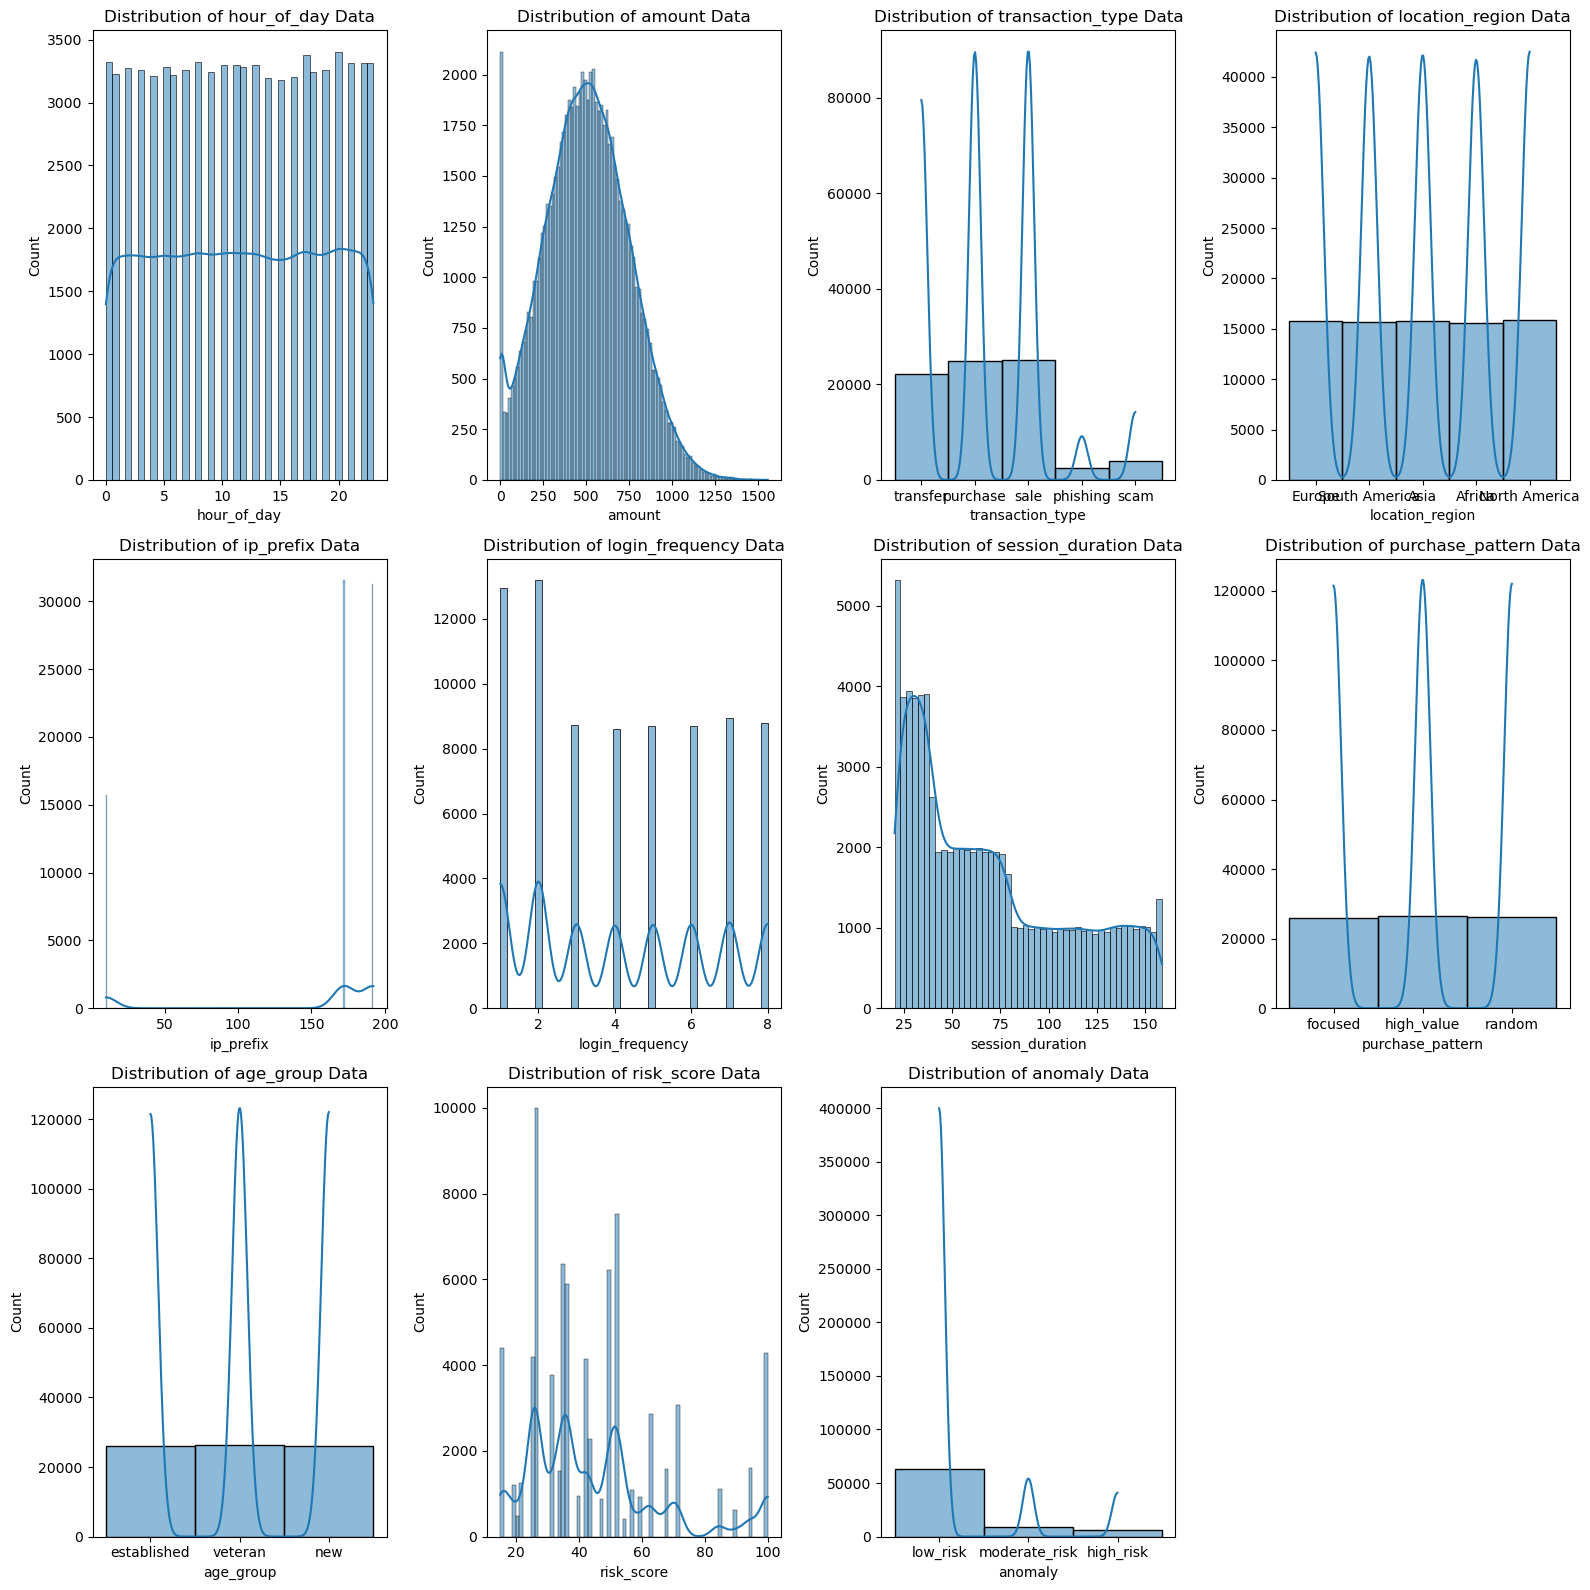

In [7]:
plt.figure(figsize=(16,16))
num_plots = len(df.columns)-1
rows = (num_plots + 3)//4


for i, col in enumerate(df.columns):
  plt.subplot(rows, 4, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col} Data")
  plt.tight_layout()
  plt.plot()
  

In [8]:
string_values_df = df.select_dtypes(include="object")

In [9]:
string_values_df

,transaction_type,location_region,purchase_pattern,age_group,anomaly
0,transfer,Europe,focused,established,low_risk
1,purchase,South America,focused,established,low_risk
2,purchase,Asia,focused,established,low_risk
3,transfer,South America,high_value,veteran,low_risk
4,sale,Africa,high_value,veteran,moderate_risk
...,...,...,...,...,...
78595,transfer,Africa,random,new,low_risk
78596,purchase,Africa,focused,established,low_risk
78597,purchase,Africa,random,new,low_risk
78598,purchase,Asia,focused,established,low_risk


In [15]:
df["sending_address"].value_counts()

sending_address
0x4bfe6fa35149db081520aea5e503946572718756    232
0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155    204
0x91ee0c3b3f87d070e260f6208c52534d36817dae    203
0xccbf5a9926606c77db8391185066a8ee3bc0a2af    203
0xf24dd92ee52bb0de1bab87766a4a3f1c17b2c4d9    203
                                             ... 
0xeb57df95b6822a78c2be987e14df39eb23221134     29
0xa08d2ae262a2181cfaef98f76adbb10396504fcf     29
0xe79cfaf34f8d8c3e20a2a202ee64e2542b74f78f     29
0xb52a1c71ffa5252b865e3e7e885f0d74b4984d60     29
0x95a91a4a20a4522edc7bd90efe20287e365b3637     29
Name: count, Length: 1161, dtype: int64

In [16]:
df["receiving_address"].value_counts()

receiving_address
0x86b61ffe9ce4da504e6b7cf3f0925c1941265074    232
0x617b83371b4c65debb6c2e90de89c827ddcb0884    203
0x897c07cac7f9149d0be00903c55d810f6e42c9cc    203
0xbc9bc0162fe1ef6624c4f9ea0139576e7407a99d    203
0x0496b829a3ede37a92aa2b9b101549ed23018cb8    203
                                             ... 
0x51a53117845631a7d7f3be1380c2ad8b1bf0b804     29
0xe0985c197011d1a8a9c495c5bd64442d16db5f36     29
0x3108e1d0956526998fc5cc8a008ea4fed631162b     29
0xf24dd92ee52bb0de1bab87766a4a3f1c17b2c4d9     29
0x6581e36d96fae9eec6e9b94802ffab6e3f017462     29
Name: count, Length: 1166, dtype: int64

In [12]:
for col in df.columns:
  col_uniques = df[col].unique()
  print("------------------------")
  if len(col_uniques) <10:
    print(f"Col is {col}")
    print(col_uniques)

------------------------
------------------------
------------------------
------------------------
------------------------
------------------------
Col is transaction_type
['transfer' 'purchase' 'sale' 'phishing' 'scam']
------------------------
Col is location_region
['Europe' 'South America' 'Asia' 'Africa' 'North America']
------------------------
Col is ip_prefix
[192.    172.    192.168 172.16   10.   ]
------------------------
Col is login_frequency
[3 5 8 6 4 1 2 7]
------------------------
------------------------
Col is purchase_pattern
['focused' 'high_value' 'random']
------------------------
Col is age_group
['established' 'veteran' 'new']
------------------------
------------------------
Col is anomaly
['low_risk' 'moderate_risk' 'high_risk']


In [10]:
df["anomaly"] = df["anomaly"].apply(lambda x: 0 if x =="low_risk" else 1 if x =="moderate_risk" else 2)
df["age_group"] = df["age_group"].apply(lambda x: 0 if x =="established" else 1 if x =="veteran" else 2)
df["purchase_pattern"] = df["purchase_pattern"].apply(lambda x: 0 if x =="focused" else 1 if x =="high_value" else 2)
df["transaction_type"] = df["transaction_type"].apply(lambda x: 0 if x =="transfer" else 1 if x =="purchase" else 2 if x == "sale" else 3 if x == "phishing" else 4)
df["location_region"] = df["location_region"].apply(lambda x: 0 if x =="Europe" else 1 if x =="South America" else 2 if x == "Asia" else 3 if x == "Africa" else 4)

In [13]:
X,y = df.drop("anomaly",axis=1), df["anomaly"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled,X_test_scaled, y_train_encoded, y_test_encoded)
models

2024-03-23 16:41:37.276963: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


492/492 [==============================] - 0s 281us/step


,Model,Accuracy
0,LogisticRegression,1.000000
1,SVC,1.000000
2,DecisionTreeClassifier,1.000000
3,RandomForestClassifier,1.000000
4,KNeighborsClassifier,0.999936
5,GradientBoostingClassifier,1.000000
6,GaussianNB,0.859733
7,Sequential,0.838677


In [26]:
X,y = df.drop("anomaly",axis=1), df["anomaly"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled,X_test_scaled, y_train_encoded, y_test_encoded)
models

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


492/492 [==============================] - 0s 254us/step


,Model,Accuracy
0,LogisticRegression,1.000000
1,SVC,1.000000
2,DecisionTreeClassifier,1.000000
3,RandomForestClassifier,1.000000
4,KNeighborsClassifier,0.999555
5,GradientBoostingClassifier,1.000000
6,GaussianNB,0.859733
7,Sequential,0.838995
